# BUSINESS CHALLENGE



House Rocket Company:

A House Rocket é uma plataforma digital que têm como modelo de negócio, a compra e a venda de imóveis utilizando dados online como critério de aquisição. O objetivo é encontrar as melhores oportunidades de negócio no mercado de imóveis. O CEO da House Rocket gostaria de maximizar a receita da empresa encontrando boas oportunidades de negócio.

A principal estratégia é adquirir imóveis em ótimas localizações com preços baixos e atrativos para revender à preços mais altos; lucrando mais, maximizando a sua receita.

https://www.kaggle.com/harlfoxem/housesalesprediction


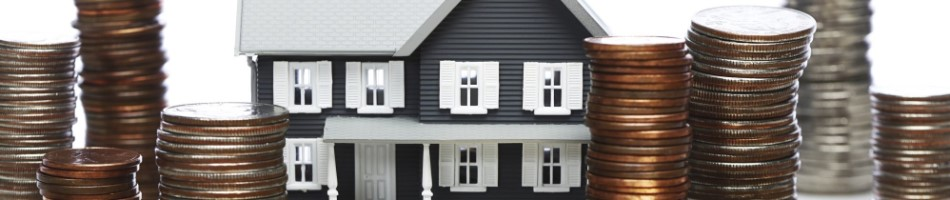

In [1]:
from IPython.display      import Image

Image( 'images.jpeg', width=1200 )

# 0.0 IMPORTS

In [2]:
# data manipulation
import pandas as pd
import numpy  as np 

import inflection
import math
import datetime

# EDA
import seaborn           as sns
import matplotlib.pyplot as plt

# Algorithms
import xgboost as xgb
import random
import warnings
warnings.filterwarnings ('ignore')

from scipy                import stats  as ss 
from IPython.core.display import HTML
from IPython.display      import Image


In [3]:
def jupyter_settings():
    %matplotlib inline
    %pylab inline
    plt.style.use( 'bmh' )
    plt.rcParams['figure.figsize'] = [25,12]
    plt.rcParams['font.size']= 24
    display( HTML( '<style>.container{ width:100% !important; }</style') )
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option( 'display.expand_frame_repr', False )
    sns.set()
jupyter_settings()

Populating the interactive namespace from numpy and matplotlib


## 0.1 Helper Functions

## 0.2 Loading Data

In [4]:
df_raw = pd.read_csv('kc_house_data.csv', low_memory=False)

In [7]:
df_raw.sample()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
17835,9406510040,20150206T000000,555000.0,4,2.5,2920,24074,2.0,0,0,3,9,2920.0,0,1997,0,98038,47.381,-122.056,2760,26023


# PASSO 1 - DATA DESCRIPTION

In [8]:
df1 = df_raw.copy()

In [6]:
df1.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170.0,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770.0,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050.0,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680.0,0,1987,0,98074,47.6168,-122.045,1800,7503


## 1.1 Rename Columns

In [7]:
df1.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [8]:
cols_old = ['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15']

snakecase = lambda x: inflection.underscore( x )

cols_new = list( map( snakecase, cols_old ) )

#rename
df1.colums = cols_new

In [9]:
df1.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

## 1.2 Data Dimensions:

In [10]:
print ( 'Number of Rows: {}'.format( df1.shape[0] ) )
print ( 'Number of Cols: {}'.format( df1.shape[1] ) )

Number of Rows: 21613
Number of Cols: 21


## 1.3 Data Types:

In [11]:
df1.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above       float64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [12]:
df1['date'] = pd.to_datetime( df1['date'] )

In [13]:
df1.dtypes

id                        int64
date             datetime64[ns]
price                   float64
bedrooms                  int64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront                int64
view                      int64
condition                 int64
grade                     int64
sqft_above              float64
sqft_basement             int64
yr_built                  int64
yr_renovated              int64
zipcode                   int64
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
dtype: object

## 1.4 Check 'NAs':

In [14]:
df1.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       2
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [15]:
df1.sample(5).T

,1359,16115,11825,8358,2541
id,3526039116,7569500010,5616000030,5309101395,2738650030
date,2014-11-18 00:00:00,2014-11-20 00:00:00,2014-10-23 00:00:00,2014-09-11 00:00:00,2015-05-11 00:00:00
price,549000.0,616950.0,335000.0,415000.0,552500.0
bedrooms,3,3,4,2,3
bathrooms,1.75,3.5,2.5,1.0,2.5
sqft_living,2000,2490,1980,910,2450
sqft_lot,6130,2722,4745,3750,3582
floors,1.0,2.0,2.0,1.0,2.0
waterfront,0,0,0,0,0
view,0,0,0,0,0


## 1.5 Descriptive Statiscal:

In [16]:
num_attributes = df1.select_dtypes( include = ['int64', 'float64'] )
cat_attributes = df1.select_dtypes( exclude = ['int64', 'float64', 'datetime64'])

In [17]:
num_attributes.sample(3)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
5935,5215200010,663000.0,3,2.5,2480,37843,1.5,1,3,4,8,2480.0,0,1974,0,98070,47.4003,-122.422,2350,42122
16460,6303400460,197000.0,2,1.0,770,8636,1.0,0,0,2,6,770.0,0,1951,0,98146,47.5075,-122.358,1110,8636
13713,2489200230,756100.0,4,2.0,2000,8317,1.5,0,0,4,8,2000.0,0,1917,0,98126,47.5394,-122.379,1390,6001


In [18]:
cat_attributes.sample(3)

""
16526
13388
18554


## 1.5.1 Numerical Atributes:

In [19]:
# Central Tendency - mean, mediana:

ct1 = pd.DataFrame( num_attributes.apply(np.mean ) ).T
ct2 = pd.DataFrame( num_attributes.apply(np.median ) ).T


# Dispersion - std, min, max, range, skew, kurtosis:

d1 = pd.DataFrame( num_attributes.apply( np.std ) ).T
d2 = pd.DataFrame( num_attributes.apply( min ) ).T
d3 = pd.DataFrame( num_attributes.apply( max ) ).T
d4 = pd.DataFrame( num_attributes.apply( lambda x: x.max() - x.min() ) ).T
d5 = pd.DataFrame( num_attributes.apply( lambda x: x.skew() ) ).T
d6 = pd.DataFrame( num_attributes.apply( lambda x: x.kurtosis() ) ).T

#Concatenate#
m = pd.concat( [d2, d3, d4, ct1, ct2, d1, d5, d6] ).T.reset_index()
m.columns = ['attributes', 'min', 'max', 'range', 'mean', 'median', 'std', 'skew', 'kurtosis']

In [20]:
m

,attributes,min,max,range,mean,median,std,skew,kurtosis
0,id,1.000102e+06,9.900000e+09,9.899000e+09,4.580302e+09,3.904930e+09,2.876499e+09,0.243329,-1.260542
1,price,7.500000e+04,7.700000e+06,7.625000e+06,5.400881e+05,4.500000e+05,3.671187e+05,4.024069,34.585540
2,bedrooms,0.000000e+00,3.300000e+01,3.300000e+01,3.370842e+00,3.000000e+00,9.300403e-01,1.974300,49.063653
3,bathrooms,0.000000e+00,8.000000e+00,8.000000e+00,2.114757e+00,2.250000e+00,7.701453e-01,0.511108,1.279902
4,sqft_living,2.900000e+02,1.354000e+04,1.325000e+04,2.079900e+03,1.910000e+03,9.184196e+02,1.471555,5.243093
5,sqft_lot,5.200000e+02,1.651359e+06,1.650839e+06,1.510697e+04,7.618000e+03,4.141955e+04,13.060019,285.077820
6,floors,1.000000e+00,3.500000e+00,2.500000e+00,1.494309e+00,1.500000e+00,5.399764e-01,0.616177,-0.484723
7,waterfront,0.000000e+00,1.000000e+00,1.000000e+00,7.541757e-03,0.000000e+00,8.651520e-02,11.385108,127.632494
8,view,0.000000e+00,4.000000e+00,4.000000e+00,2.343034e-01,0.000000e+00,7.662998e-01,3.395750,10.893022
9,condition,1.000000e+00,5.000000e+00,4.000000e+00,3.409430e+00,3.000000e+00,6.507280e-01,1.032805,0.525764


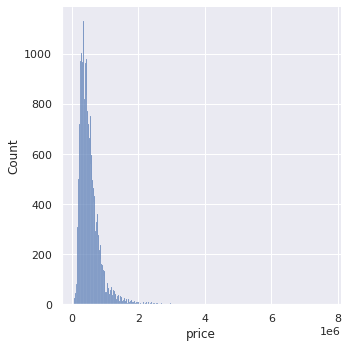

In [39]:
sns.displot( df1['price'] )
plt.show(1)

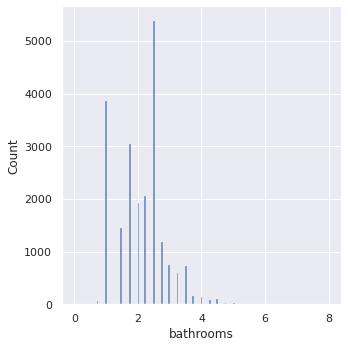

In [40]:
sns.displot( df1['bathrooms'] )
plt.show(1)

## 1.6 Categorical Attibutes:

In [23]:
cat_attributes.apply( lambda x: x.unique().shape[0] )

Series([], dtype: float64)

# PASSO 02 - FEATURE ENGINEERING

In [9]:
df2 = df1.copy()

## 2.1 MAPA MENTAL ''house_sales_prediction''

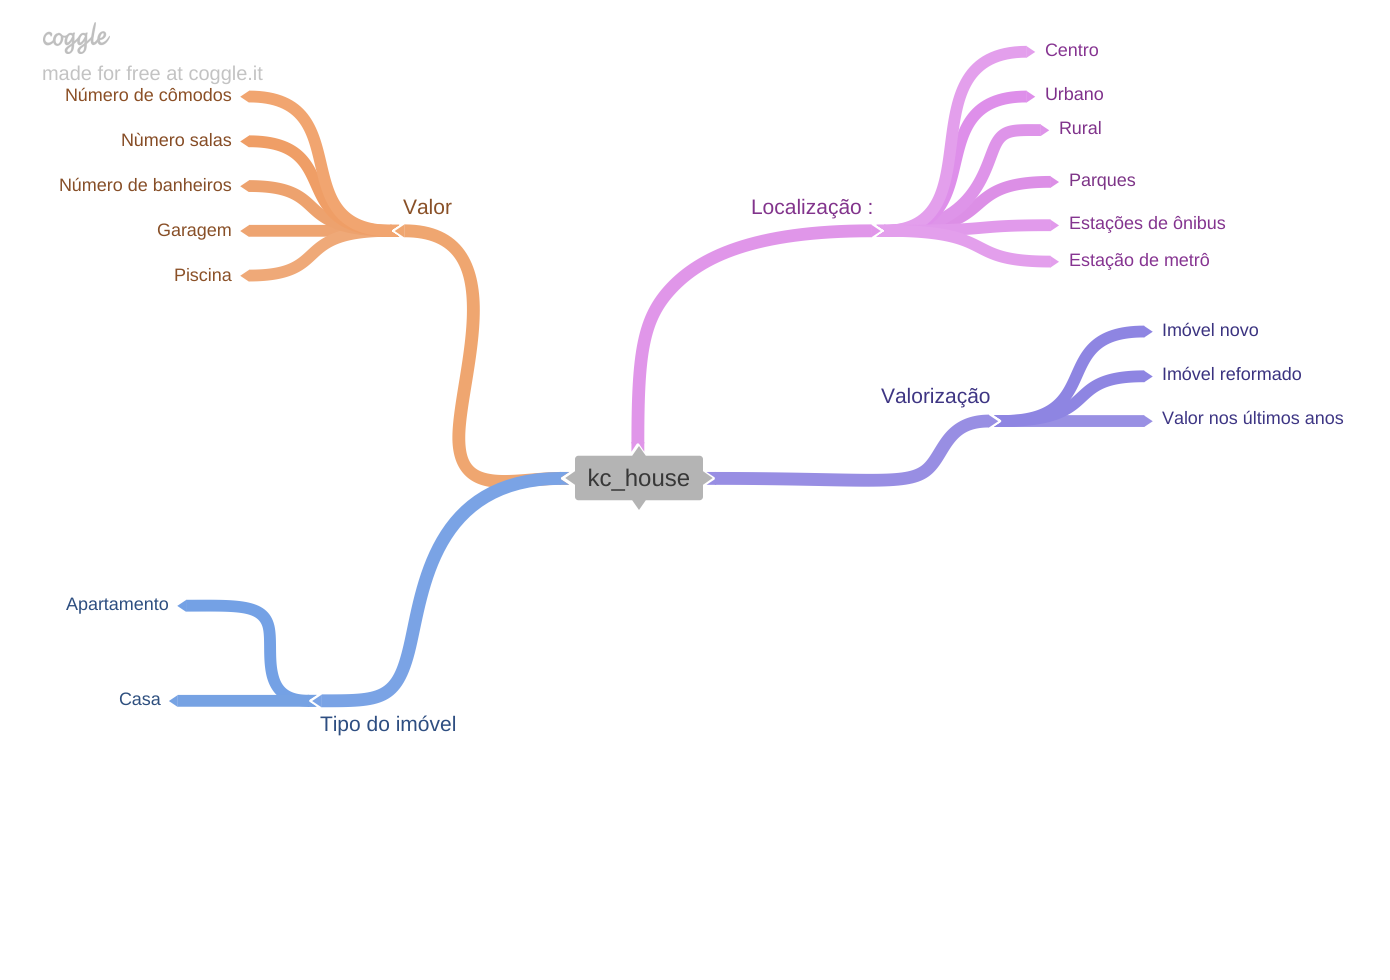

In [25]:
from IPython.display import Image

Image( 'kc_house_predictions_cogglemaps.png' )

## 2.2 Criação de hipóteses:

## 1) Imóveis nas regiões centrais têm maior valor?


## 2) Imóveis maiores têm maior valor de venda?

## 3) Imóveis com mais cômodos têm maior valor?

## 4) Imóveis menores com melhor localização são os mais procurados?

## 5) Imóveis menores e mais compactos são mais atuais e mais procurados?

# 4  PASSO 03 - ANALISE EXPLORATORIA DE DADOS

In [10]:
df3 = df2.copy()

In [27]:
df3

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170.0,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770.0,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050.0,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680.0,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,2014-05-21,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530.0,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,2015-02-23,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310.0,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,2014-06-23,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020.0,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,2015-01-16,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600.0,0,2004,0,98027,47.5345,-122.069,1410,1287


## Response Variable

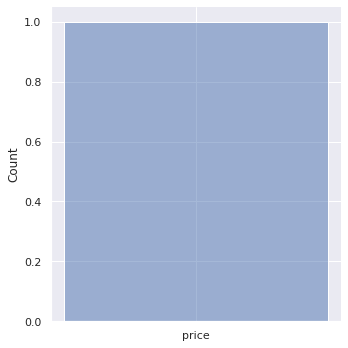

In [38]:
sns.displot( [ 'price' ], kde=True )

## Numerical Variable:

array([[<AxesSubplot:title={'center':'id'}>,
        <AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'bedrooms'}>,
        <AxesSubplot:title={'center':'bathrooms'}>],
       [<AxesSubplot:title={'center':'sqft_living'}>,
        <AxesSubplot:title={'center':'sqft_lot'}>,
        <AxesSubplot:title={'center':'floors'}>,
        <AxesSubplot:title={'center':'waterfront'}>],
       [<AxesSubplot:title={'center':'view'}>,
        <AxesSubplot:title={'center':'condition'}>,
        <AxesSubplot:title={'center':'grade'}>,
        <AxesSubplot:title={'center':'sqft_above'}>],
       [<AxesSubplot:title={'center':'sqft_basement'}>,
        <AxesSubplot:title={'center':'yr_built'}>,
        <AxesSubplot:title={'center':'yr_renovated'}>,
        <AxesSubplot:title={'center':'zipcode'}>],
       [<AxesSubplot:title={'center':'lat'}>,
        <AxesSubplot:title={'center':'long'}>,
        <AxesSubplot:title={'center':'sqft_living15'}>,
        <AxesSubplot:title={'cen

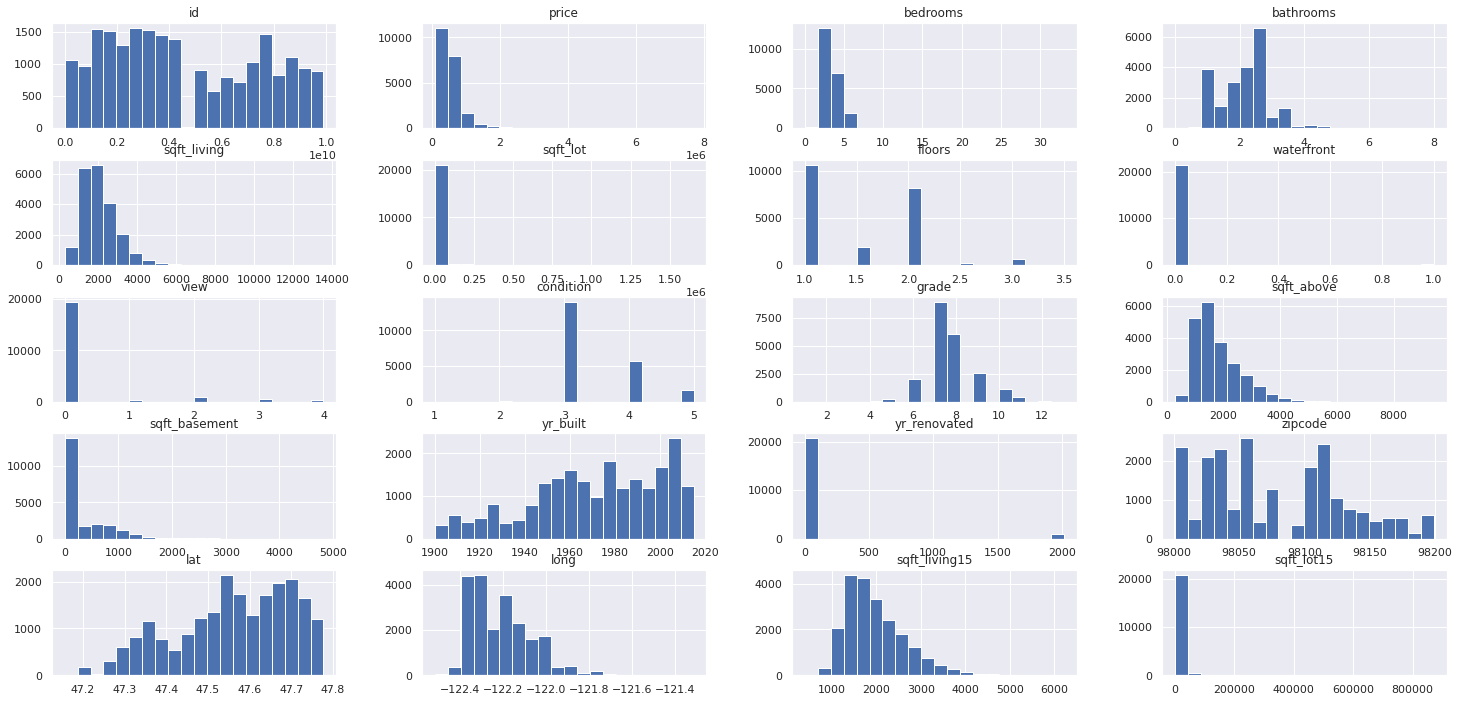

In [37]:
num_attributes.hist(bins=20)

# CEO Questions - Aula 01¶


In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('kc_house_data.csv', low_memory=False)

In [4]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170.0,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770.0,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050.0,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680.0,0,1987,0,98074,47.6168,-122.045,1800,7503


In [5]:
df.sample()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
13185,2131701075,20141204T000000,420000.0,3,1.75,1720,5000,1.5,0,0,...,8,1720.0,0,1932,2009,98019,47.738,-121.983,1410,8300


In [6]:
# 1) Quantas casas estão disponíveis para compra?

df.shape

(21613, 21)

In [7]:
# 2) Quantos atributos as casas possuem?

df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [8]:
# 3) Quais são os atributos das casas?

df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [9]:
# 4) Qual a casa mais cara ( casa com o maior valor de venda )?

df.sort_values( 'price', ascending=False)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7252,6762700020,20141013T000000,7700000.0,6,8.00,12050,27600,2.5,0,3,...,13,8570.0,3480,1910,1987,98102,47.6298,-122.323,3940,8800
3914,9808700762,20140611T000000,7062500.0,5,4.50,10040,37325,2.0,1,2,...,11,7680.0,2360,1940,2001,98004,47.6500,-122.214,3930,25449
9254,9208900037,20140919T000000,6885000.0,6,7.75,9890,31374,2.0,0,4,...,13,8860.0,1030,2001,0,98039,47.6305,-122.240,4540,42730
4411,2470100110,20140804T000000,5570000.0,5,5.75,9200,35069,2.0,0,0,...,13,6200.0,3000,2001,0,98039,47.6289,-122.233,3560,24345
1448,8907500070,20150413T000000,5350000.0,5,5.00,8000,23985,2.0,0,4,...,12,6720.0,1280,2009,0,98004,47.6232,-122.220,4600,21750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8274,3883800011,20141105T000000,82000.0,3,1.00,860,10426,1.0,0,0,...,6,860.0,0,1954,0,98146,47.4987,-122.341,1140,11250
16198,3028200080,20150324T000000,81000.0,2,1.00,730,9975,1.0,0,0,...,5,730.0,0,1943,0,98168,47.4808,-122.315,860,9000
465,8658300340,20140523T000000,80000.0,1,0.75,430,5050,1.0,0,0,...,4,430.0,0,1912,0,98014,47.6499,-121.909,1200,7500
15293,40000362,20140506T000000,78000.0,2,1.00,780,16344,1.0,0,0,...,5,780.0,0,1942,0,98168,47.4739,-122.280,1700,10387


In [12]:
# 6) Qual a soma total de quartos do conjunto de dados?

df[ 'bedrooms' ].sum()


72854

In [13]:
# 7) Quantas casas possuem 2 banheiros?

df[ df[ 'bathrooms' ] == 2 ].shape

(1930, 21)

In [14]:
# 8) Qual o preço médio de todas as casas no conjunto de dados?

df[ 'price' ].mean()

540088.1417665294

In [17]:
# 9) Qual o preço médio de casas com 2 banheiros?

df.loc[ df[ 'bathrooms' ]== 2, 'price' ].mean()

457889.7186528497

In [18]:
# 10) Qual o preço mínimo entre as casas com 3 quartos?

df.loc[ df[ 'bedrooms' ] == 3, 'price' ].min()

82000.0

In [21]:
# 11) Quantas casas possuem mais de 300 metros quadrados na sala de estar?

# df[ 'm2_living' ] = None

df[ 'm2_living' ] = df[ 'sqft_living' ] * 0.092 

df[ df[ 'm2_living'] > 300 ].shape

(2141, 22)

In [23]:
# 12) Quantas casas tem mais de 2 andares?

df[ df[ 'floors' ] > 2 ].shape

(782, 22)

In [ ]:
# 13) Quantas casas tem vista para o mar?

In [27]:
df[ df[ 'waterfront' ] == 1 ].shape

(163, 22)

In [28]:
# 14) Das casas com vista para o mar, quantas tem 3 quartos?

df[( df[ 'waterfront' ] == 1 ) & ( df[ 'bedrooms' ] == 3 )].shape

(64, 22)

In [ ]:
# 15) Das casas com mais de 300 metros quadrados de sala de estar, quantas tem mais de 2 banheiros?

In [29]:
df[( df[ 'm2_living' ] > 300 ) & ( df[ 'bathrooms' ] > 2 ) ].shape 

(2088, 22)

# CEO Questions - Aula 02

In [5]:
import pandas as pd

In [6]:
df = pd.read_csv('kc_house_data.csv', low_memory=False)

In [12]:
# 1. Qual a data do imóvel mais antigo no portfólio?

In [5]:
df[ 'date' ]= pd.to_datetime( df[ 'date' ] ) 

In [6]:
df[ 'date' ].dtypes

dtype('<M8[ns]')

In [11]:
df.sort_values( 'date', ascending=True )

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
16768,5561000190,2014-05-02,437500.0,3,2.25,1970,35100,2.0,0,0,...,9,1970.0,0,1977,0,98027,47.4635,-121.991,2340,35100
9596,472000620,2014-05-02,790000.0,3,2.50,2600,4750,1.0,0,0,...,9,1700.0,900,1951,0,98117,47.6833,-122.400,2380,4750
9587,1024069009,2014-05-02,675000.0,5,2.50,2820,67518,2.0,0,0,...,8,2820.0,0,1979,0,98029,47.5794,-122.025,2820,48351
20602,7853361370,2014-05-02,555000.0,4,2.50,3310,6500,2.0,0,0,...,8,3310.0,0,2012,0,98065,47.5150,-121.870,2380,5000
11577,5056500260,2014-05-02,440000.0,4,2.25,2160,8119,1.0,0,0,...,8,1080.0,1080,1966,0,98006,47.5443,-122.177,1850,9000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7898,1422700040,2015-05-14,183000.0,3,1.00,1170,7320,1.0,0,0,...,7,1170.0,0,1962,0,98188,47.4685,-122.282,2040,7320
928,8730000270,2015-05-14,359000.0,2,2.75,1370,1140,2.0,0,0,...,8,1080.0,290,2009,0,98133,47.7052,-122.343,1370,1090
5637,7923600250,2015-05-15,450000.0,5,2.00,1870,7344,1.5,0,0,...,7,1870.0,0,1960,0,98007,47.5951,-122.144,1870,7650
13053,5101400871,2015-05-24,445500.0,2,1.75,1390,6670,1.0,0,0,...,6,720.0,670,1941,0,98115,47.6914,-122.308,920,6380


In [14]:
# 2. Quantos imóveis possuem o número máximo de andares (3.5)?

df[ df[ 'floors' ] >= 3.5 ].shape

(8, 21)

In [20]:
# 3. Criar uma classificação para os imóveis, separando-os em baixo e alto padrão de acordo com o preço.
## Acima de 540.000 = alto padrão 
## Abaixo de 540.00 = baixo padrão

#df[ 'classification' ] = None

df.loc[ df[ 'price' ] > 540.000, 'classification' ] = 'high_level'
df.loc[ df[ 'price' ] < 540.000, 'classification' ] = 'low_level'


In [21]:
df[ 'classification' ]

0        high_level
1        high_level
2        high_level
3        high_level
4        high_level
            ...    
21608    high_level
21609    high_level
21610    high_level
21611    high_level
21612    high_level
Name: classification, Length: 21613, dtype: object

In [ ]:
# 4 Fazer um relatório ordenado pelo preço e contendo as seguintes informações:

#• Id do imóvel 
#• Data que o imóvel ficou disponível para compra 
#• O número de quartos 
#• O tamanho total do terreno 
#• O preço 
# • A classificação do imóvel (alto e baixo padrão) 

In [26]:
report = df[['id', 'date', 'bedrooms', 'sqft_lot', 'price', 'classification']]

In [27]:
report

,id,date,bedrooms,sqft_lot,price,classification
0,7129300520,2014-10-13,3,5650,221900.0,high_level
1,6414100192,2014-12-09,3,7242,538000.0,high_level
2,5631500400,2015-02-25,2,10000,180000.0,high_level
3,2487200875,2014-12-09,4,5000,604000.0,high_level
4,1954400510,2015-02-18,3,8080,510000.0,high_level
...,...,...,...,...,...,...
21608,263000018,2014-05-21,3,1131,360000.0,high_level
21609,6600060120,2015-02-23,4,5813,400000.0,high_level
21610,1523300141,2014-06-23,2,1350,402101.0,high_level
21611,291310100,2015-01-16,3,2388,400000.0,high_level


In [ ]:
# 1. Criar um mapa indicando onde as casas estão localizadas geograficamente

In [ ]:
# 2. Crie uma nova coluna chamada: "house_age" ==
    ◦ Se o valor da coluna "date" for maior que 2014-01-01 => 'new_house 
    ◦ Se o valor da coluna "date" for menor que 2014-01-01 => 'old_house 

In [7]:
df[ 'house_age' ] = None

In [11]:
df.loc[ ( df[ 'date' ] >= '2014-01-01' ), 'house_age' ] = 'new_house'

df.loc[( df[ 'date' ] < '2014-01-01' ), 'house_age'] = 'old_house'

In [12]:
df[ 'house_age' ]

0        new_house
1        new_house
2        new_house
3        new_house
4        new_house
5        new_house
6        new_house
7        new_house
8        new_house
9        new_house
10       new_house
11       new_house
12       new_house
13       new_house
14       new_house
15       new_house
16       new_house
17       new_house
18       new_house
19       new_house
20       new_house
21       new_house
22       new_house
23       new_house
24       new_house
25       new_house
26       new_house
27       new_house
28       new_house
29       new_house
30       new_house
31       new_house
32       new_house
33       new_house
34       new_house
35       new_house
36       new_house
37       new_house
38       new_house
39       new_house
40       new_house
41       new_house
42       new_house
43       new_house
44       new_house
45       new_house
46       new_house
47       new_house
48       new_house
49       new_house
50       new_house
51       new_house
52       new

In [ ]:
# 3. Crie uma nova coluna chamada: "dormitory_type"
    ◦ Se o valor da coluna "bedrooms" for igual à 1 => 'studio' 
    ◦ Se o valor da coluna "bedrooms" for igual à 2 => 'apartament'

In [13]:
df[ 'dormitory_type' ] = None

In [18]:
df.loc[ ( df[ 'bedrooms' ] == 1 ), 'dormitory_type' ] = 'studio'

df.loc[ ( df[ 'bedrooms' ] == 2 ), 'dormitory_type' ] = 'apartament'

df.loc[ ( df[ 'bedrooms' ] > 2 ), 'dormitory_type' ] = 'house'

In [19]:
df[ 'dormitory_type' ]

0             house
1             house
2        apartament
3             house
4             house
5             house
6             house
7             house
8             house
9             house
10            house
11       apartament
12            house
13            house
14            house
15            house
16            house
17            house
18       apartament
19            house
20            house
21            house
22            house
23       apartament
24            house
25            house
26            house
27            house
28            house
29            house
30            house
31       apartament
32            house
33            house
34            house
35            house
36            house
37            house
38            house
39            house
40            house
41            house
42            house
43            house
44            house
45            house
46            house
47            house
48            house
49            house


In [21]:
# 4. Crie uma nova coluna chamada: "condition_type"

# -  Se o valor da coluna "condition" for menor ou igual à 2 => 'bad' 
# -  Se o valor da coluna "condition" for igual à 3 ou 4 => 'regular' 
# -  Se o valor da coluna "condition" for igual à 5 => 'good' 

In [22]:
df[ 'condition_type' ] = None

In [27]:
df.loc[ ( df[ 'condition' ] <= 2 ), 'condition_type' ] = 'bad' 

df.loc[ ( ( df[ 'condition' ] == 3 ) | ( df[ 'condition' ] == 4 ) ), 'condition_type' ] = 'regular'

df.loc[ ( df[ 'condition' ] == 5 ), 'condition_type' ] = 'good'

In [28]:
df[ 'condition_type' ]

0        regular
1        regular
2        regular
3           good
4        regular
5        regular
6        regular
7        regular
8        regular
9        regular
10       regular
11       regular
12       regular
13       regular
14       regular
15       regular
16       regular
17       regular
18       regular
19       regular
20       regular
21       regular
22       regular
23       regular
24       regular
25          good
26       regular
27          good
28       regular
29       regular
30       regular
31       regular
32       regular
33       regular
34       regular
35       regular
36           bad
37       regular
38           bad
39       regular
40       regular
41       regular
42       regular
43       regular
44       regular
45       regular
46       regular
47       regular
48       regular
49          good
50       regular
51       regular
52       regular
53       regular
54       regular
55       regular
56       regular
57       regular
58       regul

In [ ]:
# 5. Modifique o TIPO da coluna "condition" para STRING

In [30]:
df [ 'condition' ].dtype

dtype('int64')

In [31]:
df[ 'condition' ] = df[ 'condition' ].astype( str ) 

In [33]:
df[ 'condition' ].dtype

dtype('O')

In [ ]:
# 6. Delete as colunas "sqft_living15" e "sqft_lot15"

In [35]:
df.drop( 'sqft_living15', axis='columns', inplace=True )

In [36]:
df.drop( 'sqft_lot15', axis='columns', inplace=True )

In [39]:
# 7. Modifique o TIPO da coluna "yr_built" para DATE

In [40]:
df[ 'yr_built' ].dtype

dtype('int64')

In [42]:
df[ 'yr_built' ] = pd.to_datetime( df[ 'yr_built' ] )

In [45]:
df[ 'yr_built' ].dtype

dtype('<M8[ns]')

In [ ]:
###########################33












8. Modifique o TIPO da coluna "yr_renovated" para DATE

9. Qual a data mais antiga de construção de um imóvel?

10. Qual a data mais antiga de renovação de um imóvel?

11. Quantos imóveis tem 2 andares?

12. Quantos imóveis estão com a condição igual à "regular"?

13. Quantos imóveis estão com a condição igual a "bad" e possuem "vista para água"?

14. Quantos imóveis estão com a condição igual a "good" e são "new_house"?

15. Qual o valor do imóvel mais caro do tipo "studio"?

16. Quantos imóveis do tipo "apartament" foram reformados em 2015?

17. Qual o maior número de quartos que um imóvel do tipo "house" possui?

18. Quandos imóveis "new_house" foram reformados no ano de 2014?

19. Selecione as colunas: "id = 0", "date = 1", "price = 2", "floors" = 7, "zipcode = 16" pelo método:
        ◦ Direto pelo nome das colunas
    ◦ Pelos índices
    ◦ Pelos índices das linhas e o nome das colunas
    ◦ Índices booleanos

20. Salve um arquivo .csv com somente as colunas do item 10

21. Modifique a cor dos pontos no mapa de "pink" para "verde-escuro"